# Anticipez les besoins en consommation de bâtiments

## Summary

* Categorical features
* Quantitatives features
    * [Correlation Matrix](#Correlation Matrix)
    * [NumberofBuildings](#NumberofBuildings)
    * [NumberofFloors](#NumberofFloors)
* Energy Star Score
* To predict
* Export

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',')

In [3]:
display(data.head())
print('Data shape:', data.shape)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Data shape: (3376, 46)


In [4]:
# Removing empty columns
data = data.dropna(how='all', axis=1)

# Removing empty rows
data = data.dropna(how='all', axis=0)

print(data.shape)

(3376, 45)


In [5]:
#print(data.info())

In [6]:
data_info = pd.DataFrame({'column': data.columns,
                          'non-null count': len(data)-data.isnull().sum(),
                          'null count': data.isnull().sum(),
                          '% null': data.isnull().sum() / len(data) * 100,
                          'n-unique': data.nunique(),
                          'dtype': data.dtypes})

In [7]:
display(data_info)

,column,non-null count,null count,% null,n-unique,dtype
OSEBuildingID,OSEBuildingID,3376,0,0.000000,3376,int64
DataYear,DataYear,3376,0,0.000000,1,int64
BuildingType,BuildingType,3376,0,0.000000,8,object
PrimaryPropertyType,PrimaryPropertyType,3376,0,0.000000,24,object
PropertyName,PropertyName,3376,0,0.000000,3362,object
Address,Address,3376,0,0.000000,3354,object
City,City,3376,0,0.000000,1,object
State,State,3376,0,0.000000,1,object
ZipCode,ZipCode,3360,16,0.473934,55,float64
TaxParcelIdentificationNumber,TaxParcelIdentificationNumber,3376,0,0.000000,3268,object


## OSEBuildingID

*A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.*

* ID

In [8]:
data['OSEBuildingID'].nunique()

3376

# Categorical features

## DataYear

*Calendar year (January-December) represented by each data record.*

* Only 1 category so not pertinent: only 2016

In [9]:
data['DataYear'].unique()

array([2016], dtype=int64)

In [10]:
data = data.drop('DataYear', axis=1)

In [11]:
data.shape

(3376, 44)

## Outlier

*Whether a property is a high or low outlier (Y/N)*

* Ignoring for now (deleting lines with outliers)

In [12]:
data['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [13]:
data[data['Outlier'].notnull()].head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,...,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
384,539,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,...,0.0,9.348260e+04,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,608,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,...,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
517,704,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,...,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
720,19708,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,7,...,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17


In [14]:
Outlier_agg = pd.DataFrame(data['Outlier'].value_counts().sort_values(ascending=False))
Outlier_agg

,Outlier
Low outlier,23
High outlier,9


Text(0.5, 1.0, 'Outlier != NaN repartition')

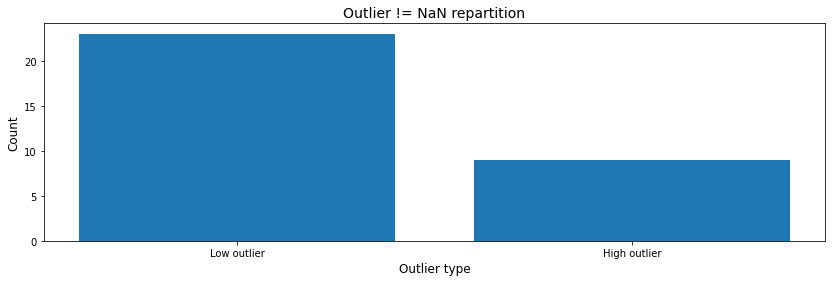

In [15]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(Outlier_agg.index, Outlier_agg['Outlier'])
ax.set_xlabel('Outlier type', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Outlier != NaN repartition', size=14)

In [16]:
data = data[data['Outlier'].isnull()]

In [17]:
data = data.drop('Outlier', axis=1)

In [18]:
data.shape

(3344, 43)

## BuildingType

*City of Seattle building type classification.*

* Nous étudions seulement les bâtiments non destinés à l'habitation, donc suppression de la data en conséquence.
* One-hot encoding

In [19]:
data['BuildingType'].nunique()

8

In [20]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [21]:
BuildingType_agg = pd.DataFrame(data['BuildingType'].value_counts().sort_values(ascending=False))
BuildingType_agg

,BuildingType
NonResidential,1445
Multifamily LR (1-4),1006
Multifamily MR (5-9),578
Multifamily HR (10+),109
SPS-District K-12,97
Nonresidential COS,84
Campus,24
Nonresidential WA,1


Text(0.5, 1.0, 'BuildingType repartition')

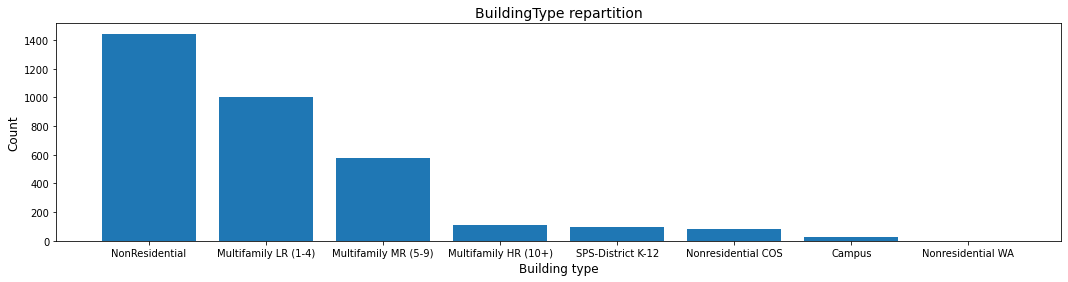

In [22]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(BuildingType_agg.index, BuildingType_agg['BuildingType'])
ax.set_xlabel('Building type', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('BuildingType repartition', size=14)

In [23]:
data = data[(data['BuildingType'] != 'Multifamily LR (1-4)')
            & (data['BuildingType'] != 'Multifamily MR (5-9)')
            & (data['BuildingType'] != 'Multifamily HR (10+)')]
data = data[data['BuildingType'] != 'Nonresidential WA'] # Only 1 line

In [24]:
BuildingType = pd.get_dummies(data['BuildingType'])
BuildingType

,Campus,NonResidential,Nonresidential COS,SPS-District K-12
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
3371,0,0,1,0
3372,0,0,1,0
3373,0,0,1,0
3374,0,0,1,0


In [25]:
BuildingType_features = BuildingType.columns.to_list()
BuildingType_features

['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12']

In [26]:
data = data.join(BuildingType)

In [27]:
data = data.drop('BuildingType', axis=1)

In [28]:
data.shape

(1650, 46)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1650 non-null   int64  
 1   PrimaryPropertyType              1650 non-null   object 
 2   PropertyName                     1650 non-null   object 
 3   Address                          1650 non-null   object 
 4   City                             1650 non-null   object 
 5   State                            1650 non-null   object 
 6   ZipCode                          1634 non-null   float64
 7   TaxParcelIdentificationNumber    1650 non-null   object 
 8   CouncilDistrictCode              1650 non-null   int64  
 9   Neighborhood                     1650 non-null   object 
 10  Latitude                         1650 non-null   float64
 11  Longitude                        1650 non-null   float64
 12  YearBuilt           

## PrimaryPropertyType

*The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.*

* Maybe use later

In [30]:
data['PrimaryPropertyType'].nunique()

22

In [31]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [32]:
PrimaryPropertyType_agg = pd.DataFrame(data['PrimaryPropertyType'].value_counts().sort_values(ascending=False))
PrimaryPropertyType_agg

,PrimaryPropertyType
Small- and Mid-Sized Office,289
Other,247
Warehouse,187
Large Office,170
K-12 School,137
Mixed Use Property,114
Retail Store,89
Hotel,75
Worship Facility,69
Distribution Center,53


In [33]:
data = data[data['PrimaryPropertyType'] != 'Low-Rise Multifamily'] # Deleting primarily residential building

Text(0.5, 1.0, 'PrimaryPropertyType repartition')

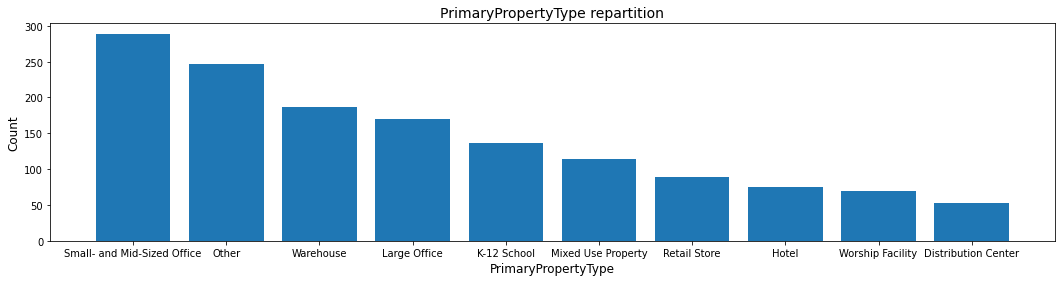

In [34]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(PrimaryPropertyType_agg[0:10].index, PrimaryPropertyType_agg['PrimaryPropertyType'][0:10])
ax.set_xlabel('PrimaryPropertyType', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('PrimaryPropertyType repartition', size=14)

In [35]:
data = data.drop('PrimaryPropertyType', axis=1)

In [36]:
data.shape

(1648, 45)

## PropertyName

*Official or common property name as entered in EPA’s Portfolio Manager.*

* Doesn't seem pertinent for now since only unique values

In [37]:
data['PropertyName'].nunique()

1644

In [38]:
data['PropertyName'].unique()

array(['Mayflower park hotel', 'Paramount Hotel',
       '5673-The Westin Seattle', ..., 'Queen Anne Pool',
       'South Park Community Center', 'Van Asselt Community Center'],
      dtype=object)

In [39]:
data = data.drop('PropertyName', axis=1)

In [40]:
data.shape

(1648, 44)

## Address

*Property street address*

* Same as *PropertyName*

In [41]:
data['Address'].nunique()

1627

In [42]:
data['Address'].unique()

array(['405 Olive way', '724 Pine street', '1900 5th Avenue', ...,
       '1920 1st Ave W', '8319 8th Ave S', '2820 S Myrtle St'],
      dtype=object)

In [43]:
data = data.drop('Address', axis=1)

In [44]:
data.shape

(1648, 43)

## City

*Property city*

* Only 1 category so not pertinent (Seattle)

In [45]:
data['City'].nunique()

1

In [46]:
data['City'].unique()

array(['Seattle'], dtype=object)

In [47]:
data = data.drop('City', axis=1)

In [48]:
data.shape

(1648, 42)

## State

*Property state*

* Only 1 category so not pertinent (WA)

In [49]:
data['State'].nunique()

1

In [50]:
data['State'].unique()

array(['WA'], dtype=object)

In [51]:
data = data.drop('State', axis=1)

In [52]:
data.shape

(1648, 41)

## ZipCode

*Property zip*

* Maybe use later

In [53]:
data['ZipCode'].nunique()

48

In [54]:
data['ZipCode'].unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98013.,
       98178., 98114., 98165., 98011., 98113., 98177., 98020., 98145.,
          nan])

In [55]:
#data['ZipCode'].value_counts()

In [56]:
data = data.drop(columns='ZipCode')

In [57]:
data.shape

(1648, 40)

## TaxParcelIdentificationNumber

*Property King County PIN*

* Almost only unique values so not pertinent
* Some data not unique, check later to gather more knowledge

In [58]:
data['TaxParcelIdentificationNumber'].nunique()

1568

In [59]:
data['TaxParcelIdentificationNumber'].unique()

array(['0659000030', '0659000220', '0659000475', ..., '3558300000',
       '7883603155', '7857002030'], dtype=object)

In [60]:
data = data.drop('TaxParcelIdentificationNumber', axis=1)

In [61]:
data.shape

(1648, 39)

## CouncilDistrictCode

*Property City of Seattle council district.*

* One-hot encoding

In [62]:
data['CouncilDistrictCode'].nunique()

7

In [63]:
data['CouncilDistrictCode'].unique()

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

In [64]:
CouncilDistrictCode_agg = pd.DataFrame(data['CouncilDistrictCode'].value_counts().sort_values(ascending=False))
CouncilDistrictCode_agg

,CouncilDistrictCode
7,522
2,392
3,200
4,169
5,132
1,118
6,115


Text(0.5, 1.0, 'CouncilDistrictCode repartition')

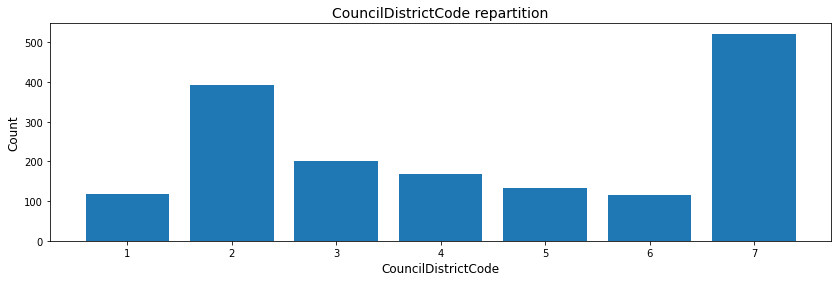

In [65]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(CouncilDistrictCode_agg.index, CouncilDistrictCode_agg['CouncilDistrictCode'])
ax.set_xlabel('CouncilDistrictCode', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('CouncilDistrictCode repartition', size=14)

In [66]:
CouncilDistrictCode = pd.get_dummies(data['CouncilDistrictCode'])
CouncilDistrictCode

,1,2,3,4,5,6,7
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
3371,0,1,0,0,0,0,0
3372,0,1,0,0,0,0,0
3373,0,0,0,0,0,0,1
3374,1,0,0,0,0,0,0


In [67]:
CouncilDistrictCode_features = CouncilDistrictCode.columns.to_list()
CouncilDistrictCode_features

[1, 2, 3, 4, 5, 6, 7]

In [68]:
data = data.join(CouncilDistrictCode)

In [69]:
data = data.drop('CouncilDistrictCode', axis=1)

In [70]:
data.shape

(1648, 45)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 0 to 3375
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1648 non-null   int64  
 1   Neighborhood                     1648 non-null   object 
 2   Latitude                         1648 non-null   float64
 3   Longitude                        1648 non-null   float64
 4   YearBuilt                        1648 non-null   int64  
 5   NumberofBuildings                1646 non-null   float64
 6   NumberofFloors                   1648 non-null   int64  
 7   PropertyGFATotal                 1648 non-null   int64  
 8   PropertyGFAParking               1648 non-null   int64  
 9   PropertyGFABuilding(s)           1648 non-null   int64  
 10  ListOfAllPropertyUseTypes        1646 non-null   object 
 11  LargestPropertyUseType           1642 non-null   object 
 12  LargestPropertyUseTy

## Neighborhood

*Property neighborhood area defined by the City of Seattle Department of Neighborhoods.*

* Maybe use later

In [72]:
data['Neighborhood'].nunique()

19

In [73]:
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [74]:
Neighborhood_agg = pd.DataFrame(data['Neighborhood'].value_counts().sort_values(ascending=False))
Neighborhood_agg

,Neighborhood
DOWNTOWN,355
GREATER DUWAMISH,342
MAGNOLIA / QUEEN ANNE,149
LAKE UNION,147
NORTHEAST,125
EAST,120
NORTHWEST,81
BALLARD,64
NORTH,58
CENTRAL,49


Text(0.5, 1.0, 'Neighborhood repartition')

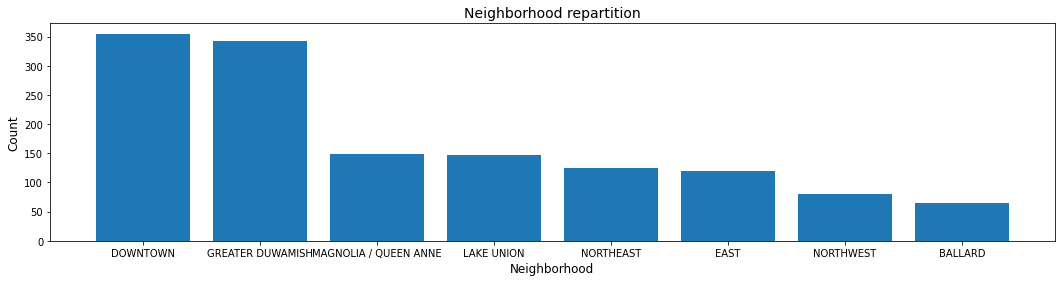

In [75]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(Neighborhood_agg[0:8].index, Neighborhood_agg['Neighborhood'][0:8])
ax.set_xlabel('Neighborhood', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Neighborhood repartition', size=14)

In [76]:
data = data.drop('Neighborhood', axis=1)

In [77]:
data.shape

(1648, 44)

## YearBuilt

*Year in which a property was constructed or underwent a complete renovation.*

* Creating an ordinal feature Building_age

In [78]:
data['YearBuilt'].nunique()

113

In [79]:
data['YearBuilt'].unique()

array([1927, 1996, 1969, 1926, 1980, 1999, 1904, 1998, 1928, 1922, 2004,
       1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1955, 1978, 1949,
       1989, 1906, 1994, 1992, 1990, 1950, 1900, 1954, 1911, 1973, 1920,
       1910, 1982, 1908, 1959, 2000, 1997, 1962, 1970, 2008, 1948, 1965,
       1929, 2010, 1938, 1986, 2002, 1923, 2003, 1957, 1964, 1941, 1963,
       2006, 1915, 1958, 2009, 2011, 1971, 2007, 1951, 1953, 1952, 1960,
       1937, 1966, 1968, 1925, 1924, 2005, 1931, 1972, 1914, 1913, 1995,
       1981, 1976, 1909, 1988, 1979, 1947, 1984, 1956, 1912, 1977, 1921,
       1945, 1974, 1975, 1946, 1967, 1987, 1940, 1932, 1993, 1918, 1905,
       1902, 1939, 1944, 1917, 1942, 1903, 2012, 2013, 1919, 1901, 1936,
       1935, 2014, 2015], dtype=int64)

Text(0.5, 1.0, 'Date de construction des bâtiments')

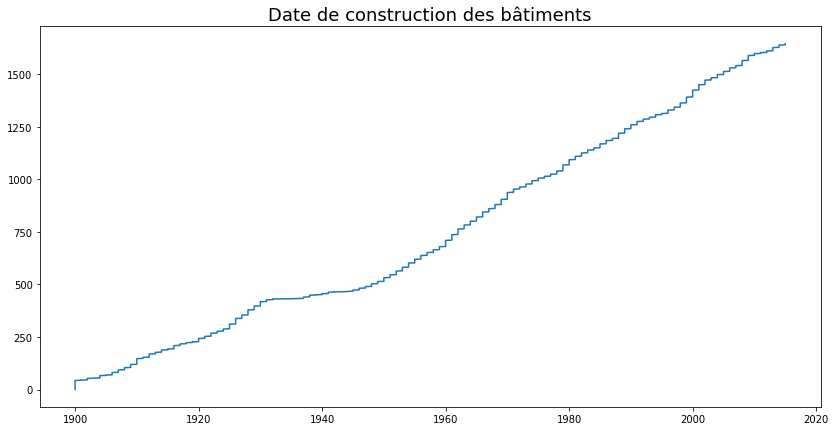

In [80]:
plt.figure(figsize=(14,7))
plt.plot(data['YearBuilt'].sort_values(ascending=True), range(len(data)), '-')
plt.title('Date de construction des bâtiments', size=18)

In [81]:
data['Building_age'] = 2016 - data['YearBuilt']

In [82]:
data['Building_age']

0       89
1       20
2       47
3       90
4       36
        ..
3371    26
3372    12
3373    42
3374    27
3375    78
Name: Building_age, Length: 1648, dtype: int64

In [83]:
data = data.drop('YearBuilt', axis=1)

In [84]:
data.shape

(1648, 44)

## ListOfAllPropertyUseTypes

*All property uses reported in Portfolio Manager*

* Need to do list aggregations like P2
* Maybe use later

In [85]:
data['ListOfAllPropertyUseTypes'].nunique()

370

In [86]:
data['ListOfAllPropertyUseTypes']

0                                                   Hotel
1                              Hotel, Parking, Restaurant
2                                                   Hotel
3                                                   Hotel
4                           Hotel, Parking, Swimming Pool
                              ...                        
3371                                               Office
3372                                   Other - Recreation
3373    Fitness Center/Health Club/Gym, Other - Recrea...
3374    Fitness Center/Health Club/Gym, Food Service, ...
3375    Fitness Center/Health Club/Gym, Food Service, ...
Name: ListOfAllPropertyUseTypes, Length: 1648, dtype: object

In [87]:
data = data.drop('ListOfAllPropertyUseTypes', axis=1)

In [88]:
data.shape

(1648, 43)

## LargestPropertyUseType

*The largest use of a property (e.g. office, retail store) by GFA.*

* Maybe use later

In [89]:
data['LargestPropertyUseType'].nunique()

56

In [90]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

In [91]:
LargestPropertyUseType_agg = pd.DataFrame(data['LargestPropertyUseType'].value_counts().sort_values(ascending=False))
LargestPropertyUseType_agg

,LargestPropertyUseType
Office,491
Non-Refrigerated Warehouse,199
K-12 School,137
Retail Store,97
Other,95
Hotel,75
Worship Facility,69
Distribution Center,54
Supermarket/Grocery Store,41
Medical Office,41


Text(0.5, 1.0, 'LargestPropertyUseType repartition')

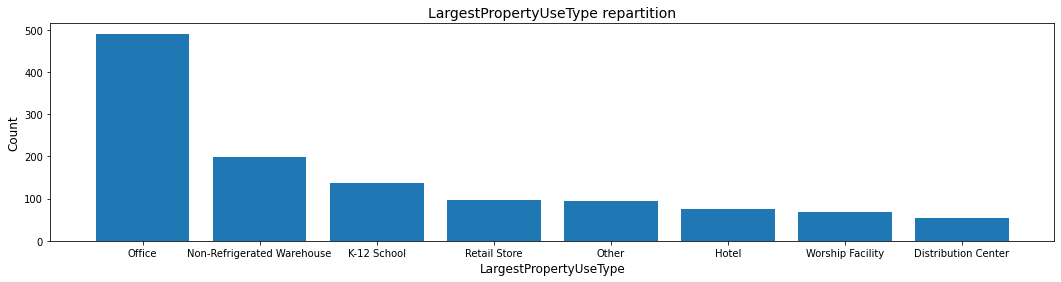

In [92]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(LargestPropertyUseType_agg[0:8].index, LargestPropertyUseType_agg['LargestPropertyUseType'][0:8])
ax.set_xlabel('LargestPropertyUseType', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('LargestPropertyUseType repartition', size=14)

In [93]:
data = data.drop('LargestPropertyUseType', axis=1)

In [94]:
data.shape

(1648, 42)

## SecondLargestPropertyUseType

*The second largest use of a property (e.g. office, retail store) by GFA.*

* Full useless, dropping

In [95]:
data['SecondLargestPropertyUseType'].nunique()

47

In [96]:
data['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/Gym', 'H

In [97]:
data = data.drop('SecondLargestPropertyUseType', axis=1)

In [98]:
data.shape

(1648, 41)

## ThirdLargestPropertyUseType

*The third largest use of a property (e.g. office, retail store) by GFA.*

* Full useless, dropping

In [99]:
data['ThirdLargestPropertyUseType'].nunique()

39

In [100]:
data['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Food Service', 'Other - Services', 'Medical Office', 'Parking',
       'Other - Utility', 'K-12 School', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Pre-school/Daycare',
       'Convenience Store without Gas Station', 'Financial Office',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Bar/Nightclub', 'Manufacturing/Industrial Plant',
       'Other/Specialty Hospital', 'Fast Food Restaurant',
       'Worship Facility', 'Supermarket/Grocery Store', 'Strip Mall',
       'Vocational School'], dtype=object)

In [101]:
data = data.drop('ThirdLargestPropertyUseType', axis=1)

In [102]:
data.shape

(1648, 40)

## DefaultData

*The property used default data for at least one property characteristic.*

* Ignoring for now, so dropping

In [103]:
data['DefaultData'].nunique()

2

In [104]:
data['DefaultData'].unique()

array([False,  True])

In [105]:
data['DefaultData'].value_counts()

False    1562
True       86
Name: DefaultData, dtype: int64

In [106]:
data = data.drop('DefaultData', axis=1)

In [107]:
data.shape

(1648, 39)

## ComplianceStatus

*Whether a property has met energy benchmarking requirements for the current reporting year.*

* Ignoring for now

In [108]:
data['ComplianceStatus'].nunique()

4

In [109]:
data['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [110]:
data['ComplianceStatus'].value_counts()

Compliant                       1545
Error - Correct Default Data      86
Missing Data                      14
Non-Compliant                      3
Name: ComplianceStatus, dtype: int64

In [111]:
data = data.drop('ComplianceStatus', axis=1)

In [112]:
data.shape

(1648, 38)

# Quantitative features

## Latitude & Longitude

*Property latitude.*

*Property longitude.*

* What to do with coordinates?
* Maybe use later

In [113]:
data = data.drop(['Latitude',
                  'Longitude'], axis=1)

In [114]:
data.shape

(1648, 36)

## *Correlation Matrix*

In [115]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [116]:
numeric_cols

['OSEBuildingID',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Building_age']

In [117]:
corrMatrix = data[numeric_cols].corr(method='spearman')

In [118]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.65) & (x < 0.9)
                          else 'background-color : green' if (x >= 0.9) & (x != 1)
                          else '')

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_age
OSEBuildingID,1.000000,-0.026989,-0.327789,-0.548369,-0.247990,-0.548913,-0.521559,-0.347455,-0.310803,-0.049405,-0.069051,-0.058867,-0.101128,-0.097031,-0.385014,-0.384666,-0.178490,-0.388186,-0.388186,-0.086654,-0.086654,-0.312475,0.023954,0.043366
NumberofBuildings,-0.026989,1.000000,-0.038080,0.059960,-0.018326,0.059245,0.081435,0.003920,0.057102,0.008508,0.021838,0.015822,0.006584,0.000086,0.056497,0.048912,0.031575,0.044557,0.044557,0.041736,0.041736,0.064096,0.045600,-0.040496
NumberofFloors,-0.327789,-0.038080,1.000000,0.502923,0.440970,0.467767,0.444212,0.513485,0.333243,0.146941,0.178232,0.143114,0.255129,0.236155,0.431471,0.412276,0.257663,0.473993,0.473993,-0.053413,-0.053413,0.279708,-0.078203,-0.086212
PropertyGFATotal,-0.548369,0.059960,0.502923,1.000000,0.422773,0.978754,0.925221,0.690707,0.542788,0.147295,0.151085,0.117056,0.218190,0.194709,0.722014,0.703731,0.203635,0.733095,0.733095,0.191194,0.191194,0.566958,-0.050850,-0.284052
PropertyGFAParking,-0.247990,-0.018326,0.440970,0.422773,1.000000,0.282736,0.330625,0.457036,0.251382,0.038895,0.201239,0.175970,0.278184,0.262460,0.354210,0.338697,0.041538,0.397342,0.397342,-0.029222,-0.029222,0.199280,-0.137262,-0.361083
PropertyGFABuilding(s),-0.548913,0.059245,0.467767,0.978754,0.282736,1.000000,0.922859,0.649927,0.532936,0.153324,0.117292,0.085087,0.175119,0.153149,0.703206,0.686341,0.213426,0.706157,0.706157,0.204509,0.204509,0.567916,-0.030948,-0.231028
LargestPropertyUseTypeGFA,-0.521559,0.081435,0.444212,0.925221,0.330625,0.922859,1.000000,0.558418,0.428836,0.178316,0.088549,0.057693,0.145091,0.122598,0.680942,0.664310,0.197576,0.682868,0.682868,0.193905,0.193905,0.550700,-0.031081,-0.288343
SecondLargestPropertyUseTypeGFA,-0.347455,0.003920,0.513485,0.690707,0.457036,0.649927,0.558418,1.000000,0.624527,0.199481,0.075925,0.043901,0.140241,0.122624,0.535400,0.520157,0.136688,0.559968,0.559968,0.054572,0.054572,0.389161,-0.155683,-0.281389
ThirdLargestPropertyUseTypeGFA,-0.310803,0.057102,0.333243,0.542788,0.251382,0.532936,0.428836,0.624527,1.000000,0.072125,0.060309,0.044172,0.136350,0.126910,0.459280,0.447924,0.132677,0.489031,0.489031,0.075423,0.075423,0.365852,-0.090206,-0.119532
ENERGYSTARScore,-0.049405,0.008508,0.146941,0.147295,0.038895,0.153324,0.178316,0.199481,0.072125,1.000000,-0.507322,-0.509222,-0.469273,-0.474590,-0.159428,-0.156141,0.013584,-0.149975,-0.149975,-0.118452,-0.118452,-0.121310,-0.312935,0.002233


## NumberofBuildings

*Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.*

* Deleted 1 outlier (111 buildings)
* 52 properties with 0 buildings?

In [119]:
data['NumberofBuildings'].nunique()

16

In [120]:
data['NumberofBuildings'].unique()

array([  1.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,  nan,
         7.,   5.,   8.,  23.,  10., 111.])

In [121]:
data['NumberofBuildings'].value_counts()

1.0      1542
0.0        52
2.0        14
3.0        12
5.0         7
6.0         4
4.0         4
8.0         2
14.0        2
9.0         1
111.0       1
11.0        1
10.0        1
23.0        1
7.0         1
27.0        1
Name: NumberofBuildings, dtype: int64

<AxesSubplot: >

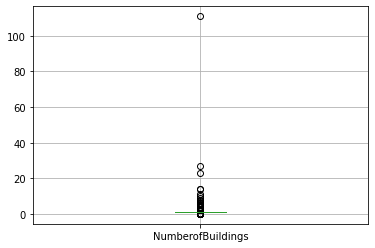

In [122]:
data.boxplot(column='NumberofBuildings')

In [123]:
data[data['NumberofBuildings'] == 111]

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,...,Nonresidential COS,SPS-District K-12,1,2,3,4,5,6,7,Building_age
3274,49967,111.0,0,9320156,0,9320156,9320156.0,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,116


In [124]:
data = data.drop(data.loc[data['NumberofBuildings'] == 111].index,  axis=0)

<AxesSubplot: >

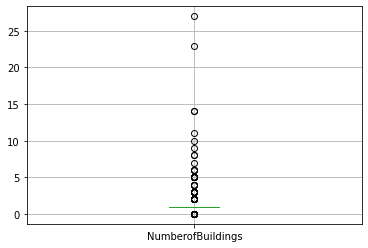

In [125]:
data.boxplot(column='NumberofBuildings')

(array([1.608e+03, 2.300e+01, 7.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

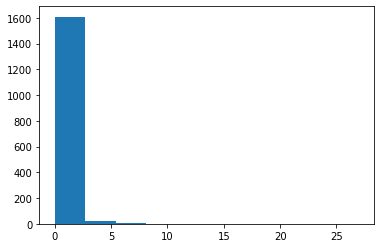

In [126]:
plt.hist(data['NumberofBuildings'])

In [127]:
#outliers_high = data[data['NumberofBuildings'] > data['NumberofBuildings'].quantile(0.975)].index

In [128]:
#outliers_high

In [129]:
#data.filter(items=outliers_high, axis=0)

In [130]:
data.shape

(1647, 36)

## NumberofFloors

*Number of floors reported in Portfolio Manager*

In [131]:
data['NumberofFloors'].nunique()

45

In [132]:
data['NumberofFloors'].unique()

array([12, 11, 41, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,  1,
        3,  4, 24, 20, 34,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 76, 27, 99, 39], dtype=int64)

In [133]:
data['NumberofFloors'].value_counts()

1     460
2     386
3     264
4     144
5     102
6      83
7      33
8      22
10     18
11     18
0      15
12      9
14      9
9       8
13      7
15      6
42      5
19      5
17      4
24      3
33      3
29      3
25      3
22      3
23      3
20      3
18      3
21      3
16      3
34      2
36      2
41      2
47      1
76      1
63      1
56      1
55      1
49      1
39      1
46      1
37      1
30      1
28      1
27      1
99      1
Name: NumberofFloors, dtype: int64

<AxesSubplot: >

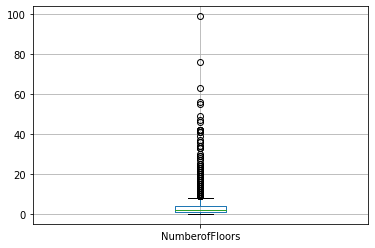

In [134]:
data.boxplot(column='NumberofFloors')

(array([1.517e+03, 8.200e+01, 2.300e+01, 1.000e+01, 1.000e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

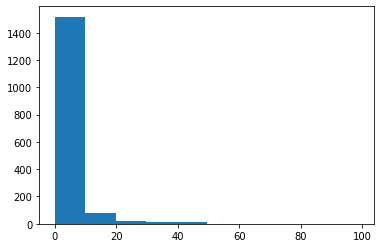

In [135]:
plt.hist(data['NumberofFloors'])

In [136]:
data.shape

(1647, 36)

## PropertyGFATotal

*Total building and parking gross floor area.*

In [137]:
data['PropertyGFATotal']

0        88434
1       103566
2       956110
3        61320
4       175580
         ...  
3371     12294
3372     16000
3373     13157
3374     14101
3375     18258
Name: PropertyGFATotal, Length: 1647, dtype: int64

<AxesSubplot: >

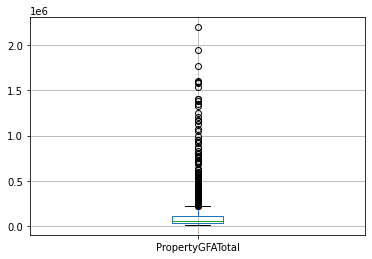

In [138]:
data.boxplot(column='PropertyGFATotal')

(array([1.45e+03, 1.28e+02, 3.00e+01, 1.50e+01, 7.00e+00, 6.00e+00,
        5.00e+00, 3.00e+00, 2.00e+00, 1.00e+00]),
 array([  11285. ,  230156.5,  449028. ,  667899.5,  886771. , 1105642.5,
        1324514. , 1543385.5, 1762257. , 1981128.5, 2200000. ]),
 <BarContainer object of 10 artists>)

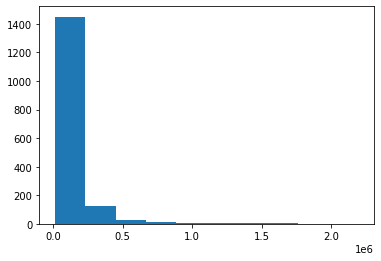

In [139]:
plt.hist(data['PropertyGFATotal'])

In [140]:
outliers_high = data[data['PropertyGFATotal'] > data['PropertyGFATotal'].quantile(0.975)].index
outliers_high

Int64Index([   2,   36,   49,   77,  124,  128,  155,  158,  166,  170,  205,
             206,  207,  212,  214,  221,  225,  227,  229,  230,  231,  233,
             261,  271,  273,  285,  292,  293,  302,  304,  307,  477,  490,
             559,  564,  577,  618, 1418, 1494, 2314, 2530, 2835],
           dtype='int64')

In [141]:
outliers_low = data[data['PropertyGFATotal'] < data['PropertyGFATotal'].quantile(0.025)].index
outliers_low

Int64Index([ 780,  859, 1027, 1030, 1106, 1132, 1134, 1162, 1191, 1244, 1472,
            1497, 1581, 1620, 1727, 1734, 1817, 2049, 2104, 2106, 2143, 2144,
            2185, 2192, 2227, 2246, 2385, 2930, 3361, 3362, 3363, 3364, 3365,
            3366, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375],
           dtype='int64')

In [142]:
data = data.drop(outliers_high)
data = data.drop(outliers_low)

In [143]:
data.shape

(1563, 36)

## PropertyGFAParking

*Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).*

* Dopping: correlated to PropertyGFATotal

In [144]:
data = data.drop('PropertyGFAParking', axis=1)

In [145]:
data.shape

(1563, 35)

## PropertyGFABuilding(s)

*Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.*

* Dropping: correlated to PropertyGFATotal

In [146]:
data = data.drop('PropertyGFABuilding(s)', axis=1)

In [147]:
data.shape

(1563, 34)

## LargestPropertyUseTypeGFA

*The gross floor area (GFA) of the largest use of the property.*

* Dropping: correlated to PropertyGFATotal

In [148]:
data = data.drop('LargestPropertyUseTypeGFA', axis=1)

In [149]:
data.shape

(1563, 33)

## SiteEnergyUse(kBtu)

*The annual amount of energy consumed by the property from all sources of energy.*

* Dropping: correlated to PropertyGFATotal

In [150]:
data = data.drop('SiteEnergyUse(kBtu)', axis=1)

In [151]:
data.shape

(1563, 32)

## SecondLargestPropertyUseTypeGFA

*The gross floor area (GFA) of the second largest use of the property.*

* Full useless, maybe use later

In [152]:
data = data.drop('SecondLargestPropertyUseTypeGFA', axis=1)

In [153]:
data.shape

(1563, 31)

## ThirdLargestPropertyUseTypeGFA

*The third largest use of a property (e.g. office, retail store) by GFA.*

* Full useless, maybe use later

In [154]:
data = data.drop('ThirdLargestPropertyUseTypeGFA', axis=1)

In [155]:
data.shape

(1563, 30)

## SiteEUIWN(kBtu/sf)

*Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to SiteEUI(kBtu/sf)

In [156]:
data = data.drop('SiteEUIWN(kBtu/sf)', axis=1)

In [157]:
data.shape

(1563, 29)

## SourceEUI(kBtu/sf)

*Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to SiteEUI(kBtu/sf)

In [158]:
data = data.drop('SourceEUI(kBtu/sf)', axis=1)

In [159]:
data.shape

(1563, 28)

## SourceEUIWN(kBtu/sf)

*Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to SiteEUI(kBtu/sf)

In [160]:
data = data.drop('SourceEUIWN(kBtu/sf)', axis=1)

In [161]:
data.shape

(1563, 27)

## SiteEnergyUseWN(kBtu)

*The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.*

* Dropping: correlated to SiteEnergyUse(kBtu)

In [162]:
data = data.drop('SiteEnergyUseWN(kBtu)', axis=1)

In [163]:
data.shape

(1563, 26)

## Electricity(kWh)

*The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.*

* Dropping: correlated to SiteEnergyUse(kBtu)

In [164]:
data = data.drop('Electricity(kWh)', axis=1)

In [165]:
data.shape

(1563, 25)

## Electricity(kBtu)

*The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).*

* Dropping: correlated to SiteEnergyUse(kBtu)

In [166]:
data = data.drop('Electricity(kBtu)', axis=1)

In [167]:
data.shape

(1563, 24)

## SiteEUI(kBtu/sf)

*Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to TotalGHGEmissions

In [168]:
data = data.drop('SiteEUI(kBtu/sf)', axis=1)

In [169]:
data.shape

(1563, 23)

## NaturalGas(therms)

*The annual amount of utility-supplied natural gas consumed by the property, measured in therms.*

* Dropping: correlated to TotalGHGEmissions

In [170]:
data = data.drop('NaturalGas(therms)', axis=1)

In [171]:
data.shape

(1563, 22)

## NaturalGas(kBtu)

*The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).*

* Dropping: correlated to TotalGHGEmissions

In [172]:
data = data.drop('NaturalGas(kBtu)', axis=1)

In [173]:
data.shape

(1563, 21)

## SteamUse(kBtu)

*The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).*

* Dropping: data we're not supposed to have for predictions

In [174]:
data = data.drop('SteamUse(kBtu)', axis=1)

In [175]:
data.shape

(1563, 20)

## GHGEmissionsIntensity

*Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources*

* Dropping for now: correlated to TotalGHGEmissions
* Maybe use later as a feature to predict

In [176]:
data = data.drop('GHGEmissionsIntensity', axis=1)

In [177]:
data.shape

(1563, 19)

## YearsENERGYSTARCertified

*Years the property has received ENERGY STAR certification.*

* 94% empty, dropping for now

In [178]:
data = data.drop('YearsENERGYSTARCertified', axis=1)

In [179]:
data.shape

(1563, 18)

## ENERGYSTARScore

*An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.*

* Dropping for now, work on it later

In [180]:
data['ENERGYSTARScore']

0       60.0
1       61.0
3       56.0
4       75.0
5        NaN
        ... 
3340     NaN
3347    77.0
3356     NaN
3360     NaN
3367     NaN
Name: ENERGYSTARScore, Length: 1563, dtype: float64

<AxesSubplot: >

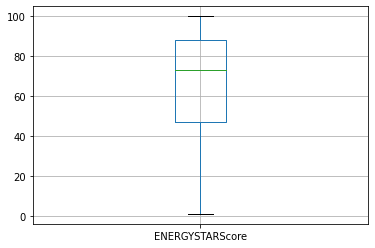

In [181]:
data.boxplot(column='ENERGYSTARScore')

(array([ 69.,  49.,  43.,  57.,  58.,  99., 108., 154., 173., 218.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

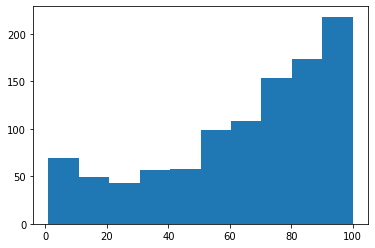

In [182]:
plt.hist(data['ENERGYSTARScore'])

In [183]:
data = data.drop('ENERGYSTARScore', axis=1)

In [184]:
data.shape

(1563, 17)

## TotalGHGEmissions (feature to predict)

*The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.*

* Removing NaN values (2 lines)

In [185]:
data['TotalGHGEmissions']

0        249.98
1        295.86
3        286.43
4        505.01
5        301.81
         ...   
3340      67.65
3347       9.24
3356    1000.06
3360       4.44
3367     259.22
Name: TotalGHGEmissions, Length: 1563, dtype: float64

<AxesSubplot: >

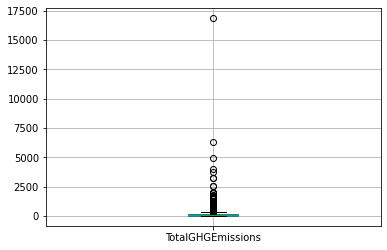

In [186]:
data.boxplot(column='TotalGHGEmissions')

(array([1.546e+03, 1.000e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-8.0000000e-01,  1.6863780e+03,  3.3735560e+03,  5.0607340e+03,
         6.7479120e+03,  8.4350900e+03,  1.0122268e+04,  1.1809446e+04,
         1.3496624e+04,  1.5183802e+04,  1.6870980e+04]),
 <BarContainer object of 10 artists>)

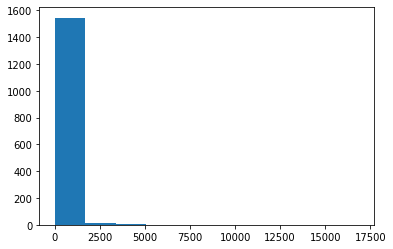

In [187]:
plt.hist(data['TotalGHGEmissions'])

In [188]:
data = data[data['TotalGHGEmissions'].notnull()]

In [189]:
data.shape

(1561, 17)

In [190]:
outliers_high = data[data['TotalGHGEmissions'] > data['TotalGHGEmissions'].quantile(0.975)].index
outliers_high

Int64Index([  17,   20,   21,   35,   59,   71,   98,  105,  119,  167,  194,
             220,  260,  262,  272,  280,  329,  334,  340,  346,  355,  373,
             429,  550,  558,  809, 1672, 1690, 1754, 2325, 2522, 3156, 3182,
            3187, 3205, 3233, 3261, 3264, 3356],
           dtype='int64')

In [191]:
outliers_low = data[data['TotalGHGEmissions'] < data['TotalGHGEmissions'].quantile(0.025)].index
outliers_low

Int64Index([  28,  152,  513,  595,  683,  684,  746,  974, 1000, 1031, 1041,
            1049, 1093, 1263, 1317, 1359, 1361, 1458, 1568, 1576, 1577, 1590,
            1641, 1658, 1698, 1994, 2105, 2145, 2151, 2182, 2199, 2205, 2332,
            2447, 2636, 2916, 2926, 3009, 3206],
           dtype='int64')

In [192]:
data = data.drop(outliers_high)
data = data.drop(outliers_low)

In [193]:
data.shape

(1483, 17)

# Multivariate Analyses

## NumberofBuildings vs NumberofFloors

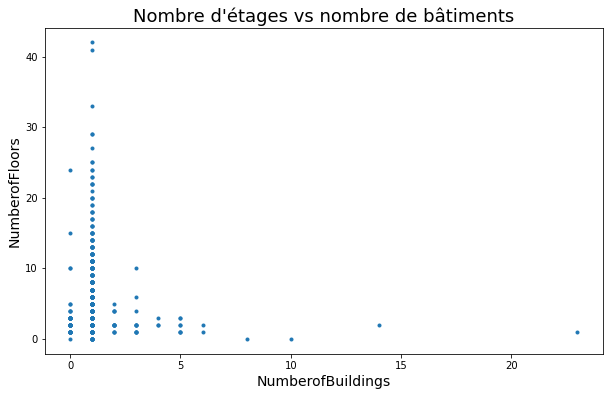

In [199]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['NumberofBuildings'], data['NumberofFloors'], '.')
ax.set_xlabel('NumberofBuildings', size=14)
ax.set_ylabel("NumberofFloors", size=14)
plt.title("Nombre d'étages vs nombre de bâtiments", size=18)
plt.show()

# Émissions vs superficie totale

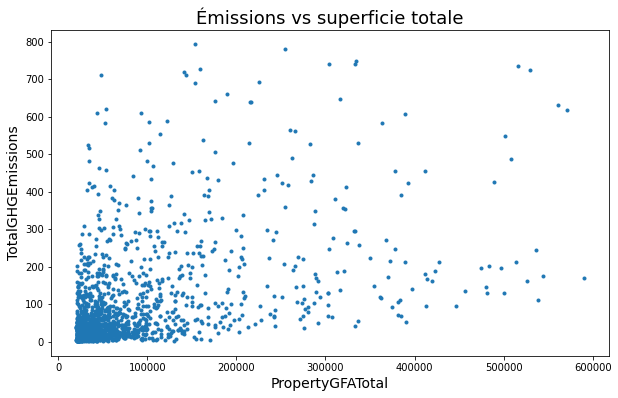

In [200]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['PropertyGFATotal'], data['TotalGHGEmissions'], '.')
ax.set_xlabel('PropertyGFATotal', size=14)
ax.set_ylabel("TotalGHGEmissions", size=14)
plt.title("Émissions vs superficie totale", size=18)
plt.show()

# Émissions vs Nombre de bâtiments

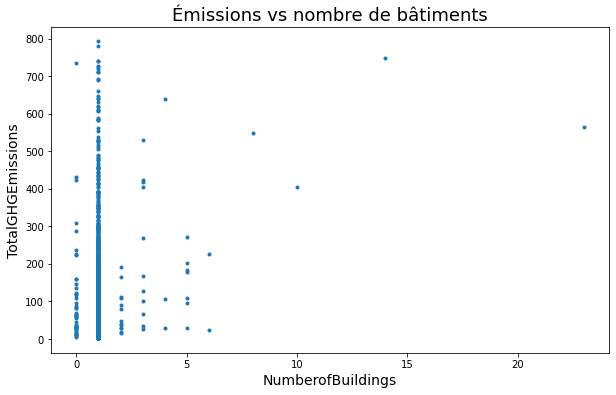

In [201]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['NumberofBuildings'], data['TotalGHGEmissions'], '.')
ax.set_xlabel('NumberofBuildings', size=14)
ax.set_ylabel("TotalGHGEmissions", size=14)
plt.title("Émissions vs nombre de bâtiments", size=18)
plt.show()

# Émissions vs âge du bâtiment

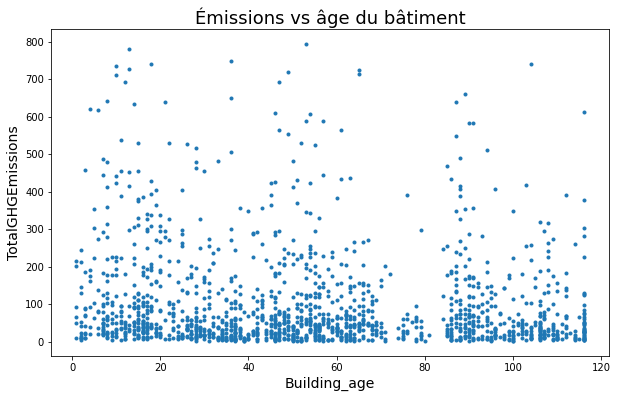

In [217]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['Building_age'], data['TotalGHGEmissions'], '.')
ax.set_xlabel('Building_age', size=14)
ax.set_ylabel("TotalGHGEmissions", size=14)
plt.title("Émissions vs âge du bâtiment", size=18)
plt.show()

# Nombre d'étages par type de bâtiment

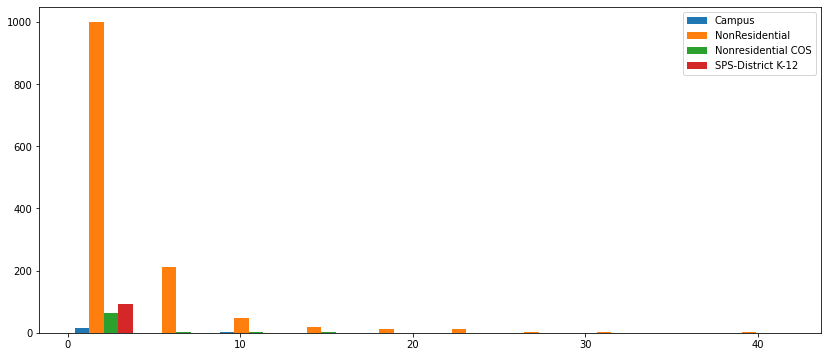

In [216]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['Campus'] == 1]['NumberofFloors'],
          data[data['NonResidential'] == 1]['NumberofFloors'],
          data[data['Nonresidential COS'] == 1]['NumberofFloors'],
          data[data['SPS-District K-12'] == 1]['NumberofFloors']], bins=10, label=['Campus',
                                                                                   'NonResidential',
                                                                                   'Nonresidential COS',
                                                                                   'SPS-District K-12'])
ax.legend()
plt.show()

# Export

In [194]:
display(data.head(1))
print(data.info())
print(data.shape)

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,1,2,3,4,5,6,7,Building_age
0,1,1.0,12,88434,249.98,0,1,0,0,0,0,0,0,0,0,1,89


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 3367
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OSEBuildingID       1483 non-null   int64  
 1   NumberofBuildings   1483 non-null   float64
 2   NumberofFloors      1483 non-null   int64  
 3   PropertyGFATotal    1483 non-null   int64  
 4   TotalGHGEmissions   1483 non-null   float64
 5   Campus              1483 non-null   uint8  
 6   NonResidential      1483 non-null   uint8  
 7   Nonresidential COS  1483 non-null   uint8  
 8   SPS-District K-12   1483 non-null   uint8  
 9   1                   1483 non-null   uint8  
 10  2                   1483 non-null   uint8  
 11  3                   1483 non-null   uint8  
 12  4                   1483 non-null   uint8  
 13  5                   1483 non-null   uint8  
 14  6                   1483 non-null   uint8  
 15  7                   1483 non-null   uint8  
 16  Buildi

In [195]:
data.to_csv('cleaned_data.csv', sep=',', index=False)

In [196]:
corrMatrix = data.corr(method='spearman')

In [197]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.65) & (x < 0.9)
                           else 'background-color : green' if (x >= 0.9) & (x != 1)
                           else '')

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,1,2,3,4,5,6,7,Building_age
OSEBuildingID,1.000000,-0.014072,-0.294925,-0.541099,-0.288549,0.015719,0.060606,0.029203,-0.112573,0.029554,0.084385,0.131386,0.086797,0.003299,-0.005128,-0.241582,0.029708
NumberofBuildings,-0.014072,1.000000,-0.033669,0.030520,0.050048,0.277259,-0.066844,-0.037474,0.003771,-0.006663,0.027706,-0.021505,0.041632,-0.006268,0.014740,-0.039095,-0.042374
NumberofFloors,-0.294925,-0.033669,1.000000,0.452481,0.190102,-0.030668,0.164953,-0.114259,-0.108930,-0.189669,-0.311761,0.056393,-0.002372,-0.094887,-0.067250,0.452917,-0.051571
PropertyGFATotal,-0.541099,0.030520,0.452481,1.000000,0.496752,0.045435,-0.062240,-0.055126,0.111076,-0.052653,-0.074101,-0.034317,-0.047976,-0.034118,-0.079170,0.218206,-0.271420
TotalGHGEmissions,-0.288549,0.050048,0.190102,0.496752,1.000000,0.113641,-0.123171,0.082906,0.044935,-0.003669,-0.143280,0.050332,-0.004363,0.013576,-0.041337,0.118514,-0.120834
Campus,0.015719,0.277259,-0.030668,0.045435,0.113641,1.000000,-0.282774,-0.022894,-0.027168,0.045163,-0.013761,0.023887,-0.013963,-0.030847,-0.029269,0.014473,-0.009065
NonResidential,0.060606,-0.066844,0.164953,-0.062240,-0.123171,-0.282774,1.000000,-0.593569,-0.704382,-0.085487,-0.007488,-0.010391,0.022947,-0.036024,-0.040220,0.091146,0.090148
Nonresidential COS,0.029203,-0.037474,-0.114259,-0.055126,0.082906,-0.022894,-0.593569,1.000000,-0.057028,-0.012841,0.010516,0.002074,-0.042558,0.030183,-0.011812,0.012968,-0.039730
SPS-District K-12,-0.112573,0.003771,-0.108930,0.111076,0.044935,-0.027168,-0.704382,-0.057028,1.000000,0.105899,0.006795,0.001951,0.011847,0.035218,0.076197,-0.138842,-0.082293
1,0.029554,-0.006663,-0.189669,-0.052653,-0.003669,0.045163,-0.085487,-0.012841,0.105899,1.000000,-0.160847,-0.101848,-0.096002,-0.083604,-0.079327,-0.190102,-0.085976
